# EC1B1 Group project


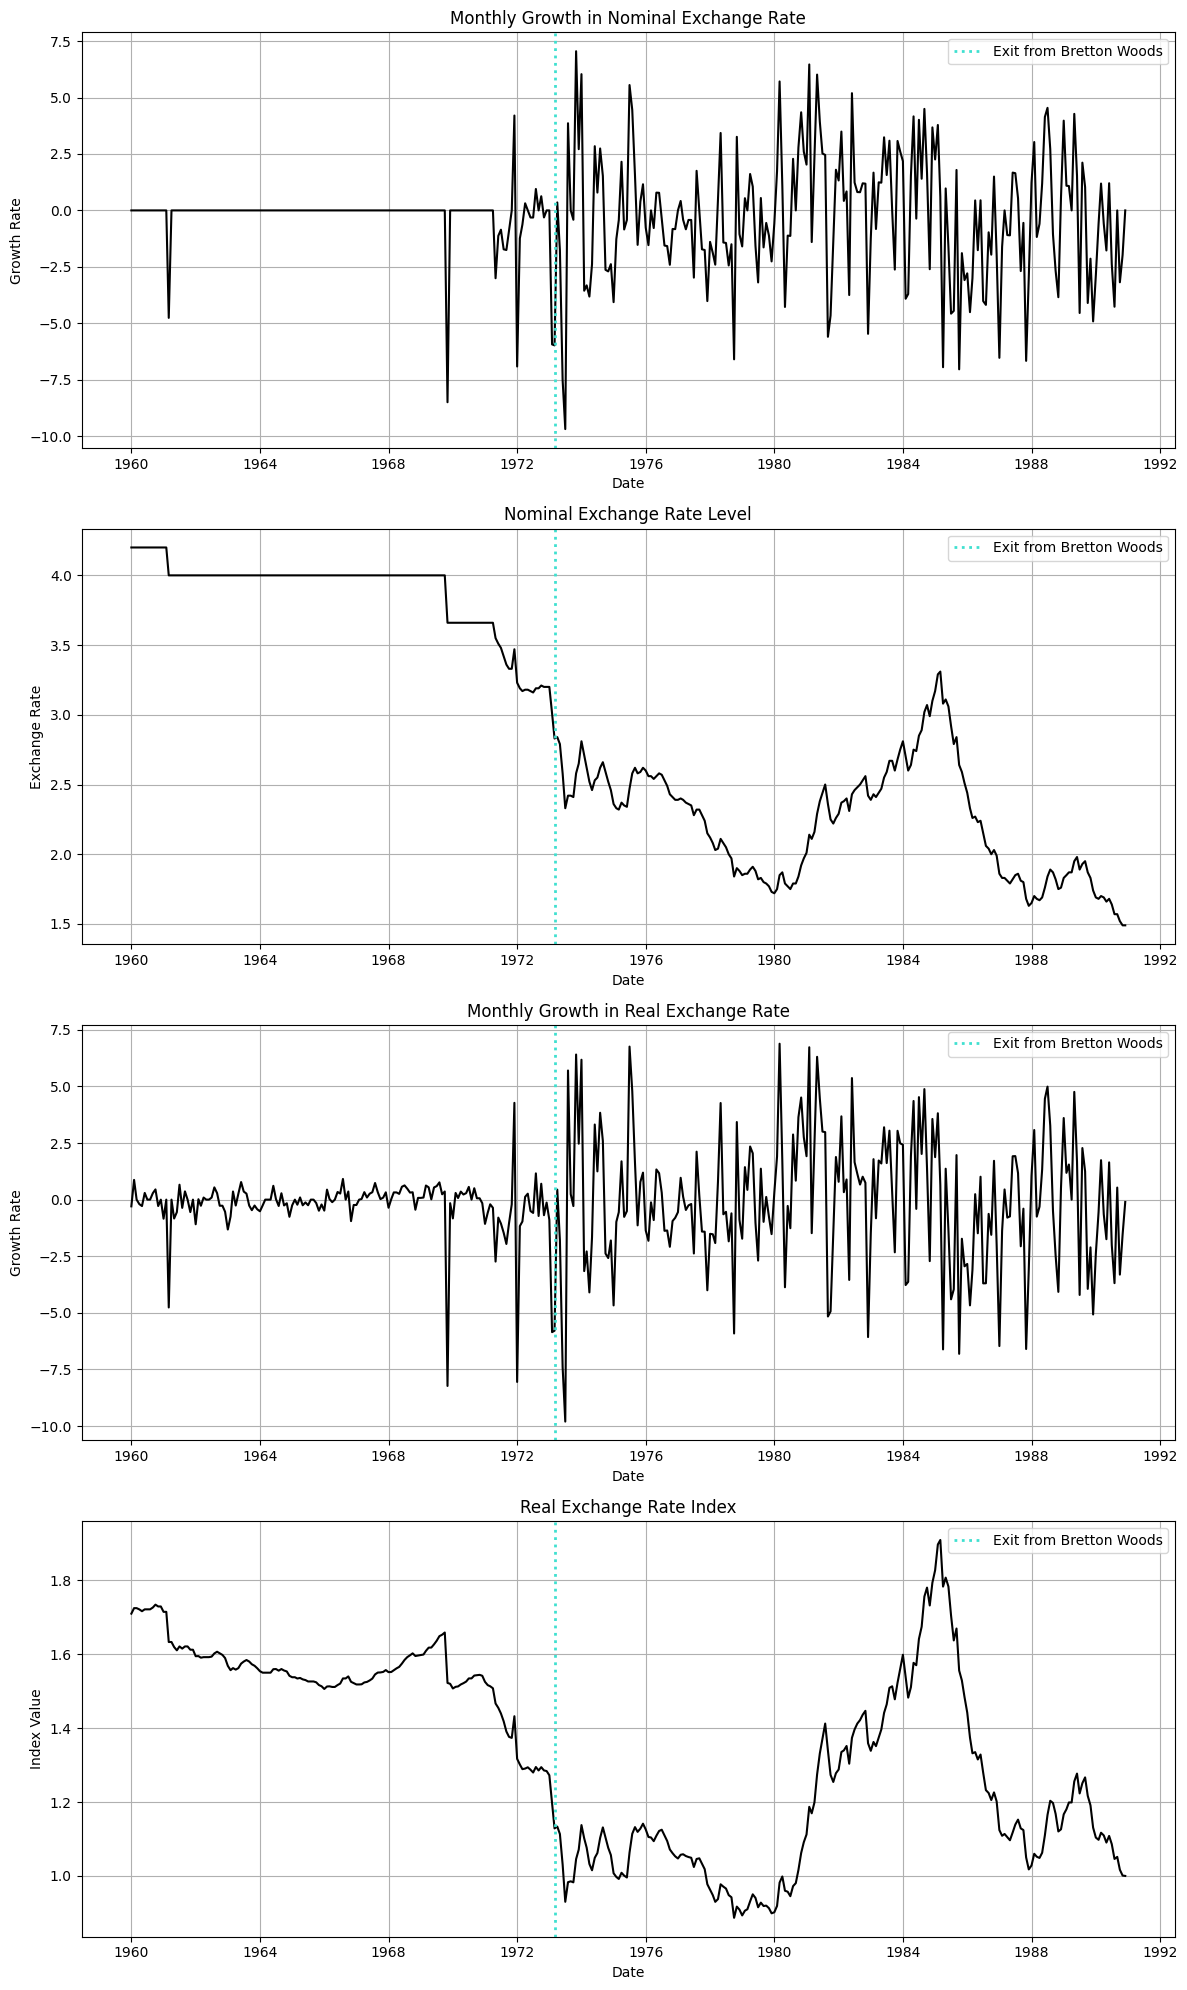

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("combined_data.csv")

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define time range: January 1960 to December 1990
start_date = "1960-01-01"
end_date = "1990-12-31"
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Select Germany 
selected_country = df['Country'].unique()[0]  # Adjust if needed
df_country = df[df['Country'] == selected_country].sort_values('Date')

# Define the date Germany left the Bretton Woods system 
bretton_woods_exit = pd.to_datetime("1973-03-01")  

# Create figure and axes
fig, axes = plt.subplots(4, 1, figsize=(12, 20))

# Line style for plots
line_style = '-'

# Bright contrasting color for Bretton Woods exit line
bretton_line_color = 'turquoise'

# Monthly growth in the nominal exchange rate
axes[0].plot(df_country['Date'], df_country['Exchange Rate Growth'], linestyle=line_style, color='black')
axes[0].axvline(bretton_woods_exit, color=bretton_line_color, linestyle='dotted', linewidth=2, label="Exit from Bretton Woods")
axes[0].set_title("Monthly Growth in Nominal Exchange Rate")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Growth Rate")
axes[0].legend()
axes[0].grid()

# Level of the nominal exchange rate
axes[1].plot(df_country['Date'], df_country['Exchange Rate'], linestyle=line_style, color='black')
axes[1].axvline(bretton_woods_exit, color=bretton_line_color, linestyle='dotted', linewidth=2, label="Exit from Bretton Woods")
axes[1].set_title("Nominal Exchange Rate Level")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Exchange Rate")
axes[1].legend()
axes[1].grid()

# Monthly growth in the real exchange rate
axes[2].plot(df_country['Date'], df_country['Real Exchange Rate Growth'], linestyle=line_style, color='black')
axes[2].axvline(bretton_woods_exit, color=bretton_line_color, linestyle='dotted', linewidth=2, label="Exit from Bretton Woods")
axes[2].set_title("Monthly Growth in Real Exchange Rate")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Growth Rate")
axes[2].legend()
axes[2].grid()

# Real exchange rate index
axes[3].plot(df_country['Date'], df_country['Real Exchange Rate Index'], linestyle=line_style, color='black')
axes[3].axvline(bretton_woods_exit, color=bretton_line_color, linestyle='dotted', linewidth=2, label="Exit from Bretton Woods")
axes[3].set_title("Real Exchange Rate Index")
axes[3].set_xlabel("Date")
axes[3].set_ylabel("Index Value")
axes[3].legend()
axes[3].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


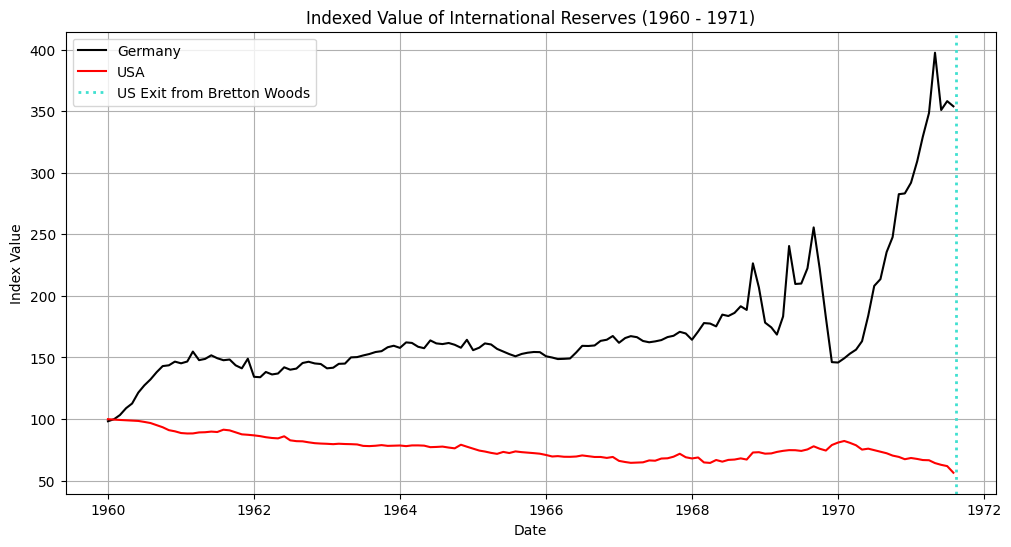

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset 
df = pd.read_csv("combined_data.csv")

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define time range: January 1960 until the US exit from Bretton Woods
start_date = "1960-01-01"
us_exit_bretton_woods = pd.to_datetime("1971-08-15")  # Adjust as needed

# Filter reserves data within the time range
df_reserves_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= us_exit_bretton_woods)]

# Select Germany
selected_country = df['Country'].unique()[0]  # Adjust if needed

# Extract reserves data for Germany and US
df_country_reserves = df_reserves_filtered[df_reserves_filtered['Country'] == selected_country][['Date', 'Reserves Index']]
df_us_reserves = df_reserves_filtered[df_reserves_filtered['Country'] == 'USA'][['Date', 'Reserves Index']]

# Create figure and axis
plt.figure(figsize=(12, 6))

# Plot reserves for Germany
plt.plot(df_country_reserves['Date'], df_country_reserves['Reserves Index'], linestyle='-', color='black', label=selected_country)

# Plot reserves for US
plt.plot(df_us_reserves['Date'], df_us_reserves['Reserves Index'], linestyle='-', color='red', label='USA')

# Mark US exit from Bretton Woods
plt.axvline(us_exit_bretton_woods, color='turquoise', linestyle='dotted', linewidth=2, label="US Exit from Bretton Woods")

# Labels and title
plt.title("Indexed Value of International Reserves (1960 - 1971)")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend()
plt.grid()

# Show plot
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("combined_data.csv")

# Convert Date officially to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define Bretton Woods periods
before_bretton_woods_end = "1971-06-30"
after_bretton_woods_start = "1973-03-01"

# Separate data for Germany and USA
df_germany = df[df['Country'] == 'Germany']
df_us = df[df['Country'] == 'USA']

# Compute Inflation Difference by merging Germany and US data on Date (reconciling stacked table)
df_merged = pd.merge(df_germany[['Date', 'Monthly Inflation Rate']],
                      df_us[['Date', 'Monthly Inflation Rate']],
                      on='Date', suffixes=('_Germany', '_US'))
df_merged['Inflation Difference'] = df_merged['Monthly Inflation Rate_Germany'] - df_merged['Monthly Inflation Rate_US']

# Merge inflation difference back to Germany dataset
df_germany = df_germany.merge(df_merged[['Date', 'Inflation Difference']], on='Date', how='left')

# Filter data before and after Bretton Woods
df_before = df_germany[df_germany['Date'] <= before_bretton_woods_end]
df_after = df_germany[df_germany['Date'] >= after_bretton_woods_start]

# Variables to calculate standard deviation for
variables = [
    "Exchange Rate Growth",  # Monthly growth of nominal exchange rate
    "Real Exchange Rate Growth",  # Monthly growth of real exchange rate
    "Monthly Inflation Rate",  # Inflation rate in Germany
    "Inflation Difference",  # Difference between Germany's inflation and US inflation
    "Growth in Industrial Production"  # 12-monthly industrial production growth
]

# Check no issue with variables existing in the dataset
variables = [var for var in variables if var in df_germany.columns]

# Compute standard deviations
std_before = df_before[variables].std()
std_after = df_after[variables].std()

# Compute ratio of standard deviations (before & after)
std_ratio = std_before / std_after

# Create results table
std_dev_table = pd.DataFrame({
    "Standard Deviation Before Bretton Woods": std_before,
    "Standard Deviation After Bretton Woods": std_after,
    "Ratio (Before / After)": std_ratio
})

# Save standard deviation table to CSV + Display
std_dev_table.to_csv("5.2.3_std_dev_table.csv", index=True)
print(std_dev_table)

                                 Standard Deviation Before Bretton Woods  \
Exchange Rate Growth                                            0.867229   
Real Exchange Rate Growth                                       0.934809   
Monthly Inflation Rate                                          0.341028   
Inflation Difference                                            0.414240   
Growth in Industrial Production                                 5.614914   

                                 Standard Deviation After Bretton Woods  \
Exchange Rate Growth                                           2.884954   
Real Exchange Rate Growth                                      2.944687   
Monthly Inflation Rate                                         0.306578   
Inflation Difference                                           0.366527   
Growth in Industrial Production                                4.686166   

                                 Ratio (Before / After)  
Exchange Rate Growth              